In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
data = pd.read_excel('C:/Users/dhckd/Study/취준/02과제평가들/쿡앱스/Purplecow_게임+데이터+분석부문/게임_데이터_분석_채용_과제_데이터.xlsx')

### 데이터 설명	
- DAU : 일일 사용자 수
- NRU : 새로 가입한 플레이어의 수
- Play Count : match3 퍼즐 게임 한 판을 플레이 시작할 때 마다 카운트가 1 증가한다
- Clear Count : match3 퍼즐 게임 한 판을 클리어 할 때 마다  카운트가 1 증가한다
- Fail Count : match3 퍼즐 게임 한 판을 실패할 때 마다 카운트가 1 증가한다
- Payer Count : 결제한 플레이어의 수
- Purchase Count : IAP 상품을 구매한 횟수
- Revenue : IAP 상품 판매로 발생한 매출
- Diamond Consumed : 프리미엄 화폐인 다이아몬드가 소비된 양.

In [4]:
data.head()

,날짜,요일,DAU,NRU,Play Count,Clear Count,Fail Count,Purchase Count,Payer Count,Revenue,Diamond Consumed
0,20151001,목,760115,23808,6392649,1883353,4509296,3337,2227,18563,551443
1,20151002,금,757910,23235,6483564,1831833,4651731,3600,2371,19539,546857
2,20151003,토,737484,21363,6221264,1732272,4488992,3548,2332,19539,518704
3,20151004,일,768441,23644,6467456,1796940,4670515,3427,2268,17347,521081
4,20151005,월,738374,19113,6147612,1832470,4315142,2998,2057,16217,509520


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   날짜                42 non-null     int64 
 1   요일                42 non-null     object
 2   DAU               42 non-null     int64 
 3   NRU               42 non-null     int64 
 4   Play Count        42 non-null     int64 
 5   Clear Count       42 non-null     int64 
 6   Fail Count        42 non-null     int64 
 7   Purchase Count    42 non-null     int64 
 8   Payer Count       42 non-null     int64 
 9   Revenue           42 non-null     int64 
 10  Diamond Consumed  42 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.7+ KB


## 과제 해결에 앞서, 전체적으로 변수들간의 상관계수를 보기위해 히트맵을 그려보았다.

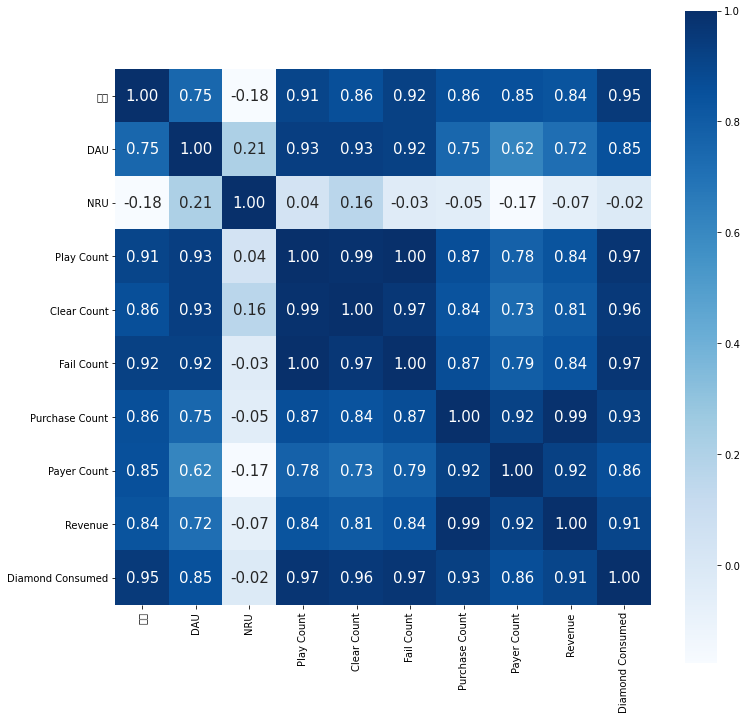

In [150]:
CopyData = data.copy()
corr = CopyData.corr(method = 'pearson') # 피어슨 상관계수 사용
plt.figure(figsize=(12,12))
df_heatmap = sns.heatmap(corr, cbar = True, annot = True, annot_kws={'size' : 15},
                         fmt = '.2f', square = True, cmap = 'Blues')

## 3-1)을 해결하기위해 플레이어가 더 오래 머문다는 것을 보여주는 지표가 무엇일지 히트맵을 참고하여 선정해보았다.
1. DAU
2. Play Count
3. Clear Count
- 위 3가지가 큰 영향을 줄 것이라 판단하고 살펴보았다.

#### 1. DAU : 일일 사용자 수

In [6]:
print("평균 일일 사용자수는 {:.2f}이다. 그리고 99%는 {:.2f} 이하의 사용자수를 기록한다. 가장 높은 사용자수는 {:.2f}이다.".format(data['DAU'].mean(),data['DAU'].quantile(0.99), data['DAU'].max()))

평균 일일 사용자수는 882627.38이다. 그리고 99%는 1022506.42 이하의 사용자수를 기록한다. 가장 높은 사용자수는 1023219.00이다.


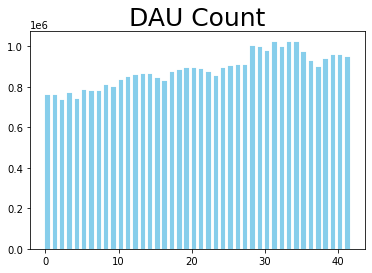

In [53]:
"""사용자수를 시각화 해보자"""
CopyData = data.copy()
# 날짜의 차이를 일정하게 하기 위해 0 ~ 41로 변경
for i in range(len(CopyData['날짜'])):
    CopyData['날짜'][i] = i
    
plt.bar(CopyData['날짜'], CopyData['DAU'], width = 0.6, align='edge', color="skyblue",
        edgecolor="skyblue", linewidth=0.1,)
plt.title("DAU Count",fontsize=25)
plt.show()

  - 그래프 상 일일 사용자 수가 증가하는 부분들이 있다. 이 중 가장 많이 증가한 날짜를 구해보았다.

In [8]:
difference = []
for i in range(len(CopyData['날짜'])-1):
    differ = CopyData['DAU'][i+1] - CopyData['DAU'][i]
    if i > 0:
        if max(difference) < differ:
            max_Differ_Day = i
    difference.append(differ)

print("가장 많이 사용자수가 늘어난 날은 {:.0f}이다.".format(data['날짜'][max_Differ_Day+1]))

가장 많이 사용자수가 늘어난 날은 20151029이다.


  - 업데이트로 인해 일일 사용자가 증가했을 가능성이 있기 때문에 업데이트는 2015년 10월 29일에 일어났다고 가정할 수 있다.
  - 하지만 일일 사용자 증가 하나로 업데이트 여부를 판단하기엔 비약이 있기 때문에 다른 요소들(Play Count, Clear Count 등)을 더 살펴보기로 한다.

#### 2. Play Count : match3 퍼즐 게임 한 판을 플레이 시작할 때 마다 카운트가 1 증가한다

In [9]:
print("평균 일일 Play Count는 {:.2f}이다. 그리고 99%는 {:.2f} 이하의 Play Count를 기록한다. 가장 높은 Play Count는 {:.2f}이다.".format(data['Play Count'].mean(),data['Play Count'].quantile(0.99), data['Play Count'].max()))

평균 일일 Play Count는 8618127.88이다. 그리고 99%는 11663017.54 이하의 Play Count를 기록한다. 가장 높은 Play Count는 11678108.00이다.


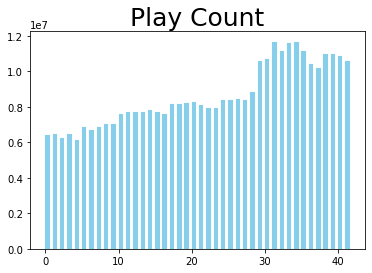

가장 많이 Play Count가 늘어난 날은 20151030이다.


In [10]:
"""Play Count를 시각화 해보자"""
CopyData = data.copy()
# 날짜의 차이를 일정하게 하기 위해 0 ~ 41로 변경
for i in range(len(CopyData['날짜'])):
    CopyData['날짜'][i] = i
    
plt.bar(CopyData['날짜'], CopyData['Play Count'], width = 0.6, align='edge', color="skyblue",
        edgecolor="skyblue", linewidth=0.1,)
plt.title("Play Count",fontsize=25)
plt.show()

"""Play Count가 가장 많이 증가한 날을 찾아보자"""
difference = []
for i in range(len(CopyData['날짜'])-1):
    differ = CopyData['Play Count'][i+1] - CopyData['Play Count'][i]
    if i > 0:
        if max(difference) < differ:
            max_Differ_Day = i
    difference.append(differ)

print("가장 많이 Play Count가 늘어난 날은 {:.0f}이다.".format(data['날짜'][max_Differ_Day+1]))

- 플레이어들이 2015년 10월 30일에 갑자기 게임을 많이하기 시작한 것을 알 수 있다.

#### 3. Clear Count : match3 퍼즐 게임 한 판을 클리어 할 때 마다  카운트가 1 증가한다 

In [11]:
print("평균 일일 Clear Count는 {:.2f}이다. 그리고 99%는 {:.2f} 이하의 Clear Count를 기록한다. 가장 높은 Play Count는 {:.2f}이다.".format(data['Clear Count'].mean(),data['Clear Count'].quantile(0.99), data['Clear Count'].max()))

평균 일일 Clear Count는 2728228.64이다. 그리고 99%는 3930888.45 이하의 Clear Count를 기록한다. 가장 높은 Play Count는 3950755.00이다.


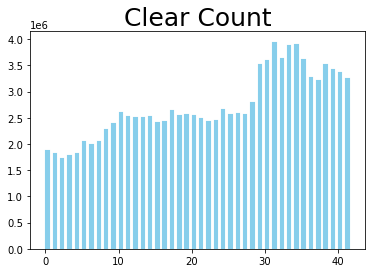

가장 많이 Clear Count가 늘어난 날은 20151030이다.


In [12]:
"""Clear Count를 시각화 해보자"""
CopyData = data.copy()
# 날짜의 차이를 일정하게 하기 위해 0 ~ 41로 변경
for i in range(len(CopyData['날짜'])):
    CopyData['날짜'][i] = i
    
plt.bar(CopyData['날짜'], CopyData['Clear Count'], width = 0.6, align='edge', color="skyblue",
        edgecolor="skyblue", linewidth=0.1,)
plt.title("Clear Count",fontsize=25)
plt.show()

"""Clear Count가 가장 많이 증가한 날을 찾아보자"""
difference = []
for i in range(len(CopyData['날짜'])-1):
    differ = CopyData['Clear Count'][i+1] - CopyData['Clear Count'][i]
    if i > 0:
        if max(difference) < differ:
            max_Differ_Day = i
    difference.append(differ)

print("가장 많이 Clear Count가 늘어난 날은 {:.0f}이다.".format(data['날짜'][max_Differ_Day+1]))

- Play Count와 Clear Count가 가장 많이 늘어난 날은 2015년 10월 30일이다. 

### 3-1-a) 답변
- 위 내용을 토대로 업데이트는 2015년 10월 29일에 이루어졌다고 판단할 수 있다.

### 3-1-b) 답변
- 업데이트 가정일 2015년 10월 29일 기준으로 DAU가 가장 크게 증가하였다. 그리고 그 증가율이 유지되는 것을 그래프를 통해 시각적으로 알 수 있다. 즉, 증가된 플레이어는 업데이트 이후 꾸준히 게임을 플레이한 것을 볼 수 있다. 
- 업데이트 가정일 이후 플레이어들은 어떤 행동을 했을지 생각해보았다. 이에 다른 지표들과 함께 살펴보았다. (이후 3-3,4,5)문항을 통해 설명)

## 3-2)을 해결하기 위해 새로운 플레이어가 유입된 것을 바탕으로 마케팅 집행기간을 추정해보았다.

#### NRU : 새로 가입한 플레이어 수

In [13]:
print("평균 일일 가입자수는 {:.2f}이다. 그리고 99%는 {:.2f} 이하의 가입자수를 기록한다. 가장 높은 가입자수는 {:.2f}이다.".format(data['NRU'].mean(),data['NRU'].quantile(0.99), data['NRU'].max()))

평균 일일 가입자수는 29253.90이다. 그리고 99%는 40473.75 이하의 가입자수를 기록한다. 가장 높은 가입자수는 40812.00이다.


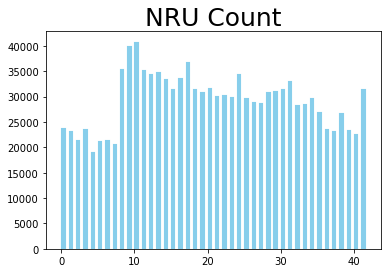

In [14]:
"""가입자수를 시각화 해보자"""
CopyData = data.copy()
# 날짜의 차이를 일정하게 하기 위해 0 ~ 41로 변경
for i in range(len(CopyData['날짜'])):
    CopyData['날짜'][i] = i
    
plt.bar(CopyData['날짜'], CopyData['NRU'], width = 0.6, align='edge', color="skyblue",
        edgecolor="skyblue", linewidth=0.1,)
plt.title("NRU Count",fontsize=25)
plt.show()

 - 그래프 상 일일 가입자 수가 증가하는 부분들이 있다. 이 중 가장 많이 가입한 날짜를 구해보았다.

In [15]:
difference = []
for i in range(len(CopyData['날짜'])-1):
    differ = CopyData['NRU'][i+1] - CopyData['NRU'][i]
    if i > 0:
        if max(difference) < differ:
            max_Differ_Day = i
    difference.append(differ)

print("가장 많이 사용자수가 늘어난 날은 {:.0f}이다.".format(data['날짜'][max_Differ_Day+1]))

가장 많이 사용자수가 늘어난 날은 20151009이다.


### 3-2-a) 답변
 - 마케팅으로 인해 신규 가입자수가 상승했을 가능성이 있기 때문에 2015년 10월 09일에 마케팅이 집행되었다고 판단할 수 있다.
 - 또한, 신규가입자가 2015년 10월 09일 이후로 꾸준히 높은 수치로 유지되는 것을(점차 감소) 볼 수 있다. 그렇기 때문에 마케팅 집행 기간은 2015년 10월 09일 이후 계속 진행된 것으로 판단하였다.

### 3-2-b), 3-2-c) 답변
- 지금까지 살펴본 바로는 특정한 변화가 보이지 않았다. 이에 다른 항목들을 탐색하며 도출되는 결과를 포함하여 판단이 필요하다. 아래 데이터 탐색을 진행하며 도출해보려 한다.
- 히트맵을 통해 상관관게를 보았을 때, NRU는 다른 항목들과 상관관계가 없는 것으로 판단된다. 이에 새로운 플레이어의 유입은 다른 변수들의 지표에 큰 영향을 미치치 않는다고 생각하였다. (상관계수가 모두 0.5 미만)

## 3-3) 업데이트를 통해 결제가 늘었다는 것을 확인 해보았다.
- 그러기 위해 Payer Count, Purchase Count, Revenue, Diamond Consumed데이터를 함께 보려고 한다.
- Fail Count 또한 소비증가에 영향을 미칠 것이라 판단하여 같이 살펴보았다.

### 3-3-a) 답변
#### 위 기획자의 판단에 있어서 가정이 잘못된 부분이 있다고 생각하였다.
- 오류 1. 게임이 재미있다고 느끼는 것이 결제로 연결된다고 가정한 것이 오류라고 생각했다. 게임의 재미를 느끼는 것이 결제를 유발하지 않는다고 생각하기 때문이다.
- 오류 2. 플레이어가 늘어남에 있어서 매출이 늘어나는 부분은 자연스러운 것이다. 집단의 크기가 커짐에 따라 따라오는 수치이기 때문이다. 그렇기 때문에 플레이어 증가량과 매출의 증가량의 비교가 필요하다(비율을 확인해야한다). 이에 DAU와 Payer Count를 확인 해보았다.

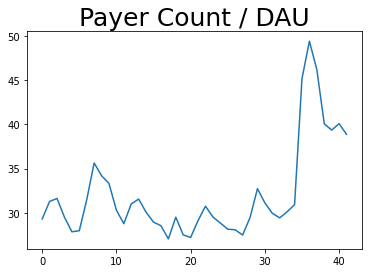

In [28]:
CopyData = data.copy()
# 날짜의 차이를 일정하게 하기 위해 0 ~ 41로 변경
for i in range(len(CopyData['날짜'])):
    CopyData['날짜'][i] = i

'''Payer Count/DAU를 구하여 그래프를 그려보았다.''' # 비율을 확인
DAU_PayerCount = []
for i in range(len(CopyData['DAU'])):
    ratio = CopyData['Payer Count'][i]/CopyData['DAU'][i]*10000
    DAU_PayerCount.append(ratio)

plt.plot(CopyData['날짜'], DAU_PayerCount)
plt.title("Payer Count / DAU",fontsize=25)
plt.show()

- Payer Count/DAU의 그래프를 통해 수치가 급상승하는 곳을 시각적으로 확인할 수 있었다. 이 구간이 언제인지 구해보았다.

In [27]:
difference = []
for i in range(len(CopyData['날짜'])-1):
    differ = DAU_PayerCount[i+1] - DAU_PayerCount[i]
    if i > 0:
        if max(difference) < differ:
            max_Differ_Day = i
    difference.append(differ)

print("가장 Payer Count/DAU가 높은 날은 {:.0f}이다.".format(data['날짜'][max_Differ_Day+1]))

가장 Payer Count/DAU가 높은 날은 20151105이다.


- 위에서 3-1)과 3-2)를 통해 2015년 10월 29일이 업데이트일이라고 판단하였다. 하지만 Payer Count/DAU가 가장 높은 날은  7일 뒤인 2015년 11월 05일이다. 이를 보고 아래와 같이 가정하였다.
1. 업데이트와 결제는 상관이 없다.
2. 업데이트 이후 7일 간 결제가 필요하지 않았지만, 7일이 지난 후 결제가 필요하게 되었다고 볼 수 있다. 이 7일은 여러 변수가 있을 수 있다. 예를 들어, 업데이트 보상이 지급된 것이 일주일 후 보상이 모두 소진되는 경우가 있을 수 있겠다.
3. 결제와 관련있는 변수가 업데이트가 아닌 Fail Count일 수 있겠다고 판단하였다. 이에 Fail Count와 Payer Count를 비교해보았다.

- 먼저, Fail Count가 증가할 수록 Payer Count가 증가할 것이라 예상하였다.
  - 게임의 구성요소 중 성취에 관련된 요소가 Fail Count이므로 이 성취를 이루기 위해 결제를 하는 유저가 많을 것이라 판단하였음.

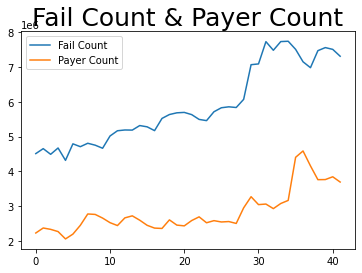

In [33]:
"""먼저 Fail Count와 Payer Count를 시각화 해보자"""
CopyData = data.copy()
# 날짜의 차이를 일정하게 하기 위해 0 ~ 41로 변경
for i in range(len(CopyData['날짜'])):
    CopyData['날짜'][i] = i
    
plt.plot(CopyData['날짜'], CopyData['Fail Count'])
plt.plot(CopyData['날짜'], CopyData['Payer Count']*1000) # 수치를 맞춰주기 위해 *1000
plt.title("Fail Count & Payer Count",fontsize=25)
plt.legend(['Fail Count', 'Payer Count'])
plt.show()

- 그래프를 보았을 때, 유의미한 상관관계를 볼 수 있다. 이에 두 변수의 차이값을 그래프로 나타내보았다.

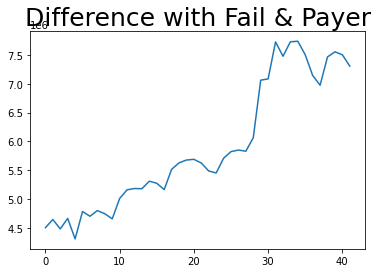

In [151]:
CopyData = data.copy()
# 날짜의 차이를 일정하게 하기 위해 0 ~ 41로 변경
for i in range(len(CopyData['날짜'])):
    CopyData['날짜'][i] = i

'''Payer Count와 DAU의 차이를 구하여 그래프를 그려보았다.'''
diff_with_Fail_Payer = []
for i in range(len(CopyData['DAU'])):
    difference = CopyData['Fail Count'][i] - CopyData['Payer Count'][i]
    diff_with_Fail_Payer.append(difference)

plt.plot(CopyData['날짜'], diff_with_Fail_Payer)
plt.title("Difference with Fail & Payer",fontsize=25)
plt.show()

- Fail Count와 Payer Count의 차이를 그래프로 나타내었을 때 일정한 수치가 아니라 증가하는 수치를 보였다. 이를 통해 Fail Count와 Payer Count가 함께 일정하게 증가하는 것이 아님을 알 수 있다. 즉, 플레이어가 클리어에 실패했을때 유료결제를 한다고 보기 힘들다.

### 3-3-b) 답변
- 위 기획자의 판단을 뒷받침하기 위해 필요한 데이터에 대해 다음과 같이 판단하였다.
1. 먼저, 이전 업데이트 당시의 데이터 혹은 다른 게임의 데이터가 필요하다고 느꼈다. 그 데이터를 통해 다이아몬드가 많이 남은 플레이어가 업데이트로 인해 재미를 느껴 다이아몬드를 빨리 소비하였는지 판단 기준을 세워야하기 때문이다.

## 이제 과제를 생각하지 않고, 자유롭게 데이터를 활용하여 3-4), 3-5), 3-6)번을 답변해 보겠습니다.

### 3-4) 답변

- 위 과정을 통해 요일별 사용자수의 증감 패턴을 볼 수 있었다. 이에 요일별 DAU를 고려하여 정기 업데이트 일정을 계획하면 어떨까 생각해보았다.

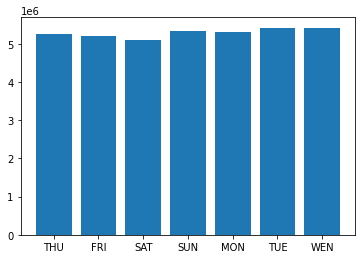

,DAY,NumOfDAU_Day
5,TUE,5425354
6,WEN,5417108
3,SUN,5328355
4,MON,5324219
0,THU,5265783
1,FRI,5213675
2,SAT,5095856


In [152]:
CopyData = data.copy()

DAY = ['THU','FRI','SAT','SUN','MON','TUE','WEN']
NumOfDAU_Day = [0,0,0,0,0,0,0]
for i in range(len(CopyData['날짜'])):
    if CopyData['요일'][i] == '목':
        NumOfDAU_Day[0] += CopyData['DAU'][i]
    elif CopyData['요일'][i] == '금':
        NumOfDAU_Day[1] += CopyData['DAU'][i]
    elif CopyData['요일'][i] == '토':
        NumOfDAU_Day[2] += CopyData['DAU'][i]
    elif CopyData['요일'][i] == '일':
        NumOfDAU_Day[3] += CopyData['DAU'][i]
    elif CopyData['요일'][i] == '월':
        NumOfDAU_Day[4] += CopyData['DAU'][i]
    elif CopyData['요일'][i] == '화':
        NumOfDAU_Day[5] += CopyData['DAU'][i]
    else: # 수요일
        NumOfDAU_Day[6] += CopyData['DAU'][i]

plt.bar(DAY, NumOfDAU_Day)
plt.show()

# DAU순으로 정렬
NumOfDAU_Day = pd.DataFrame(NumOfDAU_Day)
DAY = pd.DataFrame(DAY)
result = pd.concat([DAY, NumOfDAU_Day], axis=1)
result.columns=['DAY','NumOfDAU_Day']
result1 = result.sort_values(by=['NumOfDAU_Day'], axis=0, ascending=False, inplace=False)
result1

- 위 내용에서 화요일과 수요일이 가장 많은 누적DAU를 가지는 걸 볼 수 있다.
- 이에 업데이트 보상 등의 마케팅을 화요일과 수요일에 중점적으로 진행하면 좋은 효과를 볼 수 있을 것이라 예상 된다.
- 여기서 더 발전하여 생각해 볼 것은 누적DAU만이 아닌 다른 변수들을 포함하여 '플레이어의 활동성'을 판단해보면 비교적 정확한 마케팅 시점을 찾을 수 있을 것 같아 진행해 보았다.

- 먼저 플레이어의 활동을 나타낼 수 있는 지표가 무엇일지 선정해보았다.
1. DAU: 위에서 확인해보았다.
2. Play Count: 게임 한 판을 시작하는 숫자이다. 이는 곧 플레이어의 활동과 직결되는 변수이므로 선정하였다. (Clear Count는 Play Count로 대체할 수 있는 수치를 보였기 때문에 생략하였다)
3. Fail Count: 플레이어가 실패를 겪는 것은 플레이어의 '성취'와 직결되는 변수이므로 충분히 플레이어 활동과 연관성이 있다고 판단하여 선정하였다.
4. Diamond Consumed: 이 지표가 높을수록 플레이어가 게임 내에서 활발한 소비활동을 하는 것이므로 선정하였다.

In [153]:
"""위에서 요일별 DAU를 구하여 만든 DataFrame에
Play Count, Fail Count, Diamond Consumed를 추가해준다"""

DAY = ['THU','FRI','SAT','SUN','MON','TUE','WEN']
# Play Count
NumOfPlay_Day = [0,0,0,0,0,0,0]
for i in range(len(CopyData['날짜'])):
    if CopyData['요일'][i] == '목':
        NumOfPlay_Day[0] += CopyData['Play Count'][i]
    elif CopyData['요일'][i] == '금':
        NumOfPlay_Day[1] += CopyData['Play Count'][i]
    elif CopyData['요일'][i] == '토':
        NumOfPlay_Day[2] += CopyData['Play Count'][i]
    elif CopyData['요일'][i] == '일':
        NumOfPlay_Day[3] += CopyData['Play Count'][i]
    elif CopyData['요일'][i] == '월':
        NumOfPlay_Day[4] += CopyData['Play Count'][i]
    elif CopyData['요일'][i] == '화':
        NumOfPlay_Day[5] += CopyData['Play Count'][i]
    else: # 수요일
        NumOfPlay_Day[6] += CopyData['Play Count'][i]
        
# Fail Count
NumOfFail_Day = [0,0,0,0,0,0,0]
for i in range(len(CopyData['날짜'])):
    if CopyData['요일'][i] == '목':
        NumOfFail_Day[0] += CopyData['Fail Count'][i]
    elif CopyData['요일'][i] == '금':
        NumOfFail_Day[1] += CopyData['Fail Count'][i]
    elif CopyData['요일'][i] == '토':
        NumOfFail_Day[2] += CopyData['Fail Count'][i]
    elif CopyData['요일'][i] == '일':
        NumOfFail_Day[3] += CopyData['Fail Count'][i]
    elif CopyData['요일'][i] == '월':
        NumOfFail_Day[4] += CopyData['Fail Count'][i]
    elif CopyData['요일'][i] == '화':
        NumOfFail_Day[5] += CopyData['Fail Count'][i]
    else: # 수요일
        NumOfFail_Day[6] += CopyData['Fail Count'][i]
        
# Diamond Consumed
NumOfDiamond_Day = [0,0,0,0,0,0,0]
for i in range(len(CopyData['날짜'])):
    if CopyData['요일'][i] == '목':
        NumOfDiamond_Day[0] += CopyData['Diamond Consumed'][i]
    elif CopyData['요일'][i] == '금':
        NumOfDiamond_Day[1] += CopyData['Diamond Consumed'][i]
    elif CopyData['요일'][i] == '토':
        NumOfDiamond_Day[2] += CopyData['Diamond Consumed'][i]
    elif CopyData['요일'][i] == '일':
        NumOfDiamond_Day[3] += CopyData['Diamond Consumed'][i]
    elif CopyData['요일'][i] == '월':
        NumOfDiamond_Day[4] += CopyData['Diamond Consumed'][i]
    elif CopyData['요일'][i] == '화':
        NumOfDiamond_Day[5] += CopyData['Diamond Consumed'][i]
    else: # 수요일
        NumOfDiamond_Day[6] += CopyData['Diamond Consumed'][i]
        
        
NumOfPlay_Day = pd.DataFrame(NumOfPlay_Day)
NumOfFail_Day = pd.DataFrame(NumOfFail_Day)
NumOfDiamond_Day = pd.DataFrame(NumOfDiamond_Day)

result = pd.concat([result, NumOfPlay_Day, NumOfFail_Day, NumOfDiamond_Day], axis=1)
result.columns=['DAY','DAU', 'Play Count', 'Fail Count', 'Diamond consumed']
result2 = result.sort_values(by=['DAU'], axis=0, ascending=False, inplace=False)

In [154]:
result2

,DAY,DAU,Play Count,Fail Count,Diamond consumed
5,TUE,5425354,53731556,36748708,5220318
6,WEN,5417108,53269310,36468432,5210621
3,SUN,5328355,53298830,36114110,5306976
4,MON,5324219,52547421,35976868,5051937
0,THU,5265783,49213389,33835492,4791707
1,FRI,5213675,50190170,34387237,4946817
2,SAT,5095856,49710695,33844905,4979749


#### 이제 DAY 기준으로 각 변수들의 그래프를 그려보았다.

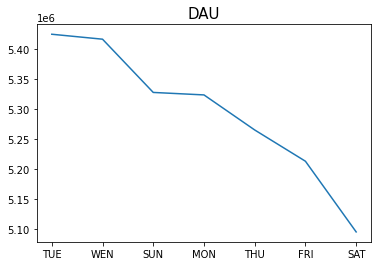

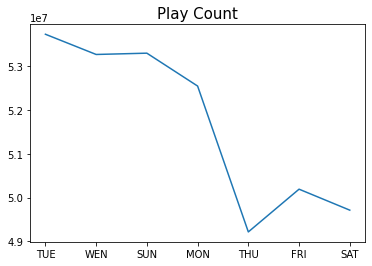

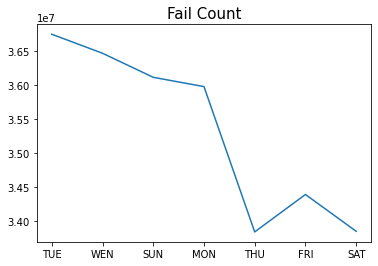

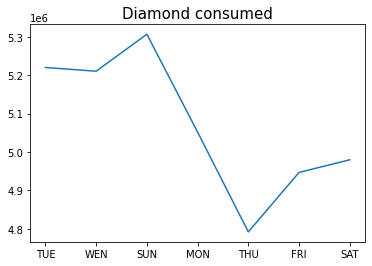

In [149]:
plt.title("DAU",fontsize=15)
plt.plot('DAY', 'DAU', data=result2)
plt.show()

plt.title("Play Count",fontsize=15)
plt.plot('DAY', 'Play Count', data=result2)
plt.show()

plt.title("Fail Count",fontsize=15)
plt.plot('DAY', 'Fail Count', data=result2)
plt.show()

plt.title("Diamond consumed",fontsize=15)
plt.plot('DAY', 'Diamond consumed', data=result2)
plt.show()

#plt.figure(figsize=(20, 20))
#plt.show()

- 위 결과를 통해 Diamond consumed에서 특이한 점을 볼 수 있었다.
- 플레이어들이 많이 접속하고, 많이 게임을 하는 요일은 화요일과 수요일인 것을 알 수 있다. 하지만 다이아몬드 소비량은 그 다음날인 일요일에 상승하는 것을 볼 수 있다.
- 이는 플레이어가 많은 것과 관계가 없는 것이며, 여기서 추론할 수 있는 것은 헤비유저와 라이트 유저를 다르게 봐야한다고 판단할 수 있다.

#### 헤비 유저와 라이트 유저의 특징을 구분지어 보았다.
1. 헤비유저: 다이아몬드를 꾸준히 소비하는 유저이며 특정 요일에 상관없이 꾸준히하는 유저라고 볼 수 있다. 
2. 라이트유저: 다이아몬드 소비와 관계없이 플레이를 하는 유저로, 특정 요일에 좀 더 많이 하는 것으로 볼 수 있다.

- 헤비유저는 요일마다 일정하게 유지된다고 가정할 수 있다. 그렇기 때문에 다이아몬드 소비량이 증가하는 것은 헤비유저만을 놓고 보아야하며, 일요일에 DAU, Play Count, Fail Count가 감소하는 것과 관계없이 다이아몬드 소비량이 증가하는 것을 설명할 수 있다.

### 주어지지 않은 데이터를 가정해보았다.
1. 일일 접속 횟수
2. 일일 누적 접속 시간
3. 일일 게임 클리어 횟수

 -- 위 3가지 가상 데이터를 통해 헤비유저와 라이트 유저를 나눌 수 있을 것이다. 그리고 이렇게 나누어 분석을 한다면 타겟에 맞는 마케팅을 할 수 있을 것이며, 나아가 게임 레벨 디자인에 참고할 수 있는 지표를 도출 할 수 있을 것이다.

### 3-5) 답변
- 변수들 간 상관관계를 중심으로 생각하였습니다. 주어진 데이터는 날짜와 요일 데이터를 제외하고 모두 수치형 데이터입니다. 그렇기 때문에 더욱 상관관계가 중요하다고 생각하였고, 이에 중점을 맞추어 진행하였습니다.

### 3-6) 답변

- 발견한 인사이트들을 위의 답변들을 통해 설명하였습니다.